In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
from IPython.display import display_html, HTML, Image
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


In [3]:
# importing packages and other items used
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
conn = sqlite3.connect('MLB_Data.db')

In [4]:
# allows tables to be printed side by side.. i.e. comparing between LHP/RHP
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table', 
            'table style="display:inline"'),raw=True)

In [5]:
# created tables to use for graphing Avg runs against LHP/RHP
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#---------------------------------------------------------------------#
cur.execute('''DROP TABLE IF EXISTS [RHP_RvsAB]''')
cur.execute('''DROP TABLE IF EXISTS [LHP_RvsAB]''')
cur.execute('''CREATE TABLE RHP_RvsAB(teams, ab, r)''')
cur.execute('''CREATE TABLE LHP_RvsAB(teams, ab, r)''')
cur.execute("INSERT INTO RHP_RvsAB VALUES ('30', '123020', '17004')")
cur.execute("INSERT INTO LHP_RvsAB VALUES ('30', '42547', '5578')")


conn.commit()
conn.close()

In [6]:
# setting league averages for each option
leagueAVGRHP = 0.254867
leagueRunAvgRHP = 1.854
leagueAVGLHP = 0.255
leagueRunAvgLHP = 1.956

In [7]:
# set func with total runs scored against each Pitcher
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()

sql_averageLHP = "SELECT * FROM MLB_vs_LHP_2017"
averageLHP = pd.read_sql_query(sql_averageLHP, conn)
#----------------------------------------------------#
sql_averageRHP = "SELECT * FROM MLB_vs_RHP_2017"
averageRHP = pd.read_sql_query(sql_averageRHP, conn)
#----------------------------------------------------#
RHPruns = sum(averageRHP['R'])
RHPab = sum(averageRHP['AB'])
RHPavg = RHPab/RHPruns
LHPruns = sum(averageLHP['R'])
LHPab = sum(averageLHP['AB'])
LHPavg = LHPab/LHPruns

# Code Louisville 2018 - Python Project
## Is a Left-Handed Pitcher better than a Right-Handed Pitcher
#### Created By Devin Francis

<table><tr><td><img src='img/LHP.jpeg'></td><td><img src='img/RHP.jpeg'></td></tr></table>
## Is a Left-Handed Pitcher better than a Right-Handed Pitcher?
The rumor is that a Left-Handed Pitcher is better than a Right-Handed Pitcher. This stems from the theory that when a pitcher and batter share the same dominant hand (i.e. Right-Handed Pitcher vs Right-Handed Batter), that the Pitcher gets the advantage.  Since there are less left-handed batters in the MLB, the theory is born.  I have decided to take data from the 2017 season and put that theory to the test. 

#### The first thing that I did was gather all the data from 2017 in regards to stats against Left-Handed Pitchers.  Here is the stats for each team against LHP.  I have displayed the Top 5 and Bottom 5 teams.

In [8]:
display_side_by_side(averageLHP.head(), averageLHP.tail())

,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
0,1,CLE,140,1926,280,520,106,7,71,853,267,0.270,0.351,0.443,0.794
1,2,COL,129,1554,241,436,89,10,62,731,232,0.281,0.344,0.470,0.814
2,3,LAD,133,1571,227,398,97,6,65,702,222,0.253,0.342,0.447,0.789
3,4,MIN,132,1602,224,416,87,8,47,660,218,0.260,0.332,0.412,0.744
4,5,HOU,117,1426,212,396,80,6,59,665,200,0.278,0.348,0.466,0.814
,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
25,26,OAK,130,1355,161,319,71,4,44,530,152,0.235,0.313,0.391,0.704
26,27,STL,116,1179,160,298,56,8,50,520,153,0.253,0.336,0.441,0.777
27,28,SD,117,1444,150,327,60,6,52,555,146,0.226,0.294,0.384,0.679
28,29,LAA,118,1375,149,317,54,5,30,471,139,0.231,0.306,0.343,0.649


#### I did the same thing for the data against RHP.  

In [9]:
display_side_by_side(averageRHP.head(), averageRHP.tail())

,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
0,1,HOU,162,4185,684,1185,266,14,179,2016,654,0.283,0.345,0.482,0.827
1,2,NYY,162,4146,660,1093,202,16,185,1882,634,0.264,0.341,0.454,0.795
2,3,WAS,162,4326,650,1139,241,23,170,1936,631,0.263,0.332,0.448,0.780
3,4,CHI,161,4115,622,1038,218,20,172,1812,594,0.252,0.334,0.440,0.774
4,5,BOS,162,4435,617,1132,231,15,137,1804,577,0.255,0.323,0.407,0.729
,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
25,26,CWS,160,4056,506,1004,185,24,141,1660,478,0.248,0.307,0.409,0.716
26,27,PHI,158,3972,506,1018,210,24,126,1654,480,0.256,0.319,0.416,0.736
27,28,PIT,159,4168,502,1016,195,27,112,1601,474,0.244,0.318,0.384,0.702
28,29,SF,160,3893,460,964,203,24,95,1500,437,0.248,0.307,0.385,0.693


In [10]:
# sets up table displaying a teams AVG to RUNS ratio
teamsRunsvsAVGLHP = averageLHP[['TEAM', 'AVG','H', 'R']]
teamsRunsvsAVGRHP = averageRHP[['TEAM', 'AVG', 'H', 'R']]

#### The next step is to condense the data down for the first part.  To see the difference in batting averages against each opposing pitcher.

#### First, we get the data against LHP:

In [11]:
display_side_by_side(teamsRunsvsAVGLHP.describe())

,AVG,H,R
count,30.000000,30.000000,30.000000
mean,0.255000,361.600000,185.933333
std,0.015559,46.749221,28.979105
min,0.226000,298.000000,143.000000
25%,0.244000,327.500000,168.250000
50%,0.253000,359.000000,179.500000
75%,0.266250,386.500000,199.500000
max,0.281000,520.000000,280.000000


#### Then we get the data against RHP:

In [12]:
display_side_by_side(teamsRunsvsAVGRHP.describe())

,AVG,H,R
count,30.000000,30.000000,30.000000
mean,0.254867,1045.566667,566.800000
std,0.009839,66.276164,54.323044
min,0.236000,924.000000,454.000000
25%,0.248000,1006.250000,539.250000
50%,0.255500,1035.000000,564.000000
75%,0.260750,1093.750000,601.000000
max,0.283000,1185.000000,684.000000


#### As we can see, the average batting average against each opposing pitcher isn't too far off. There is a difference of 0.001.

#### Digging deeper into the theory, the below chart shows each teams batting average in comparison to the league's average against LHP.  

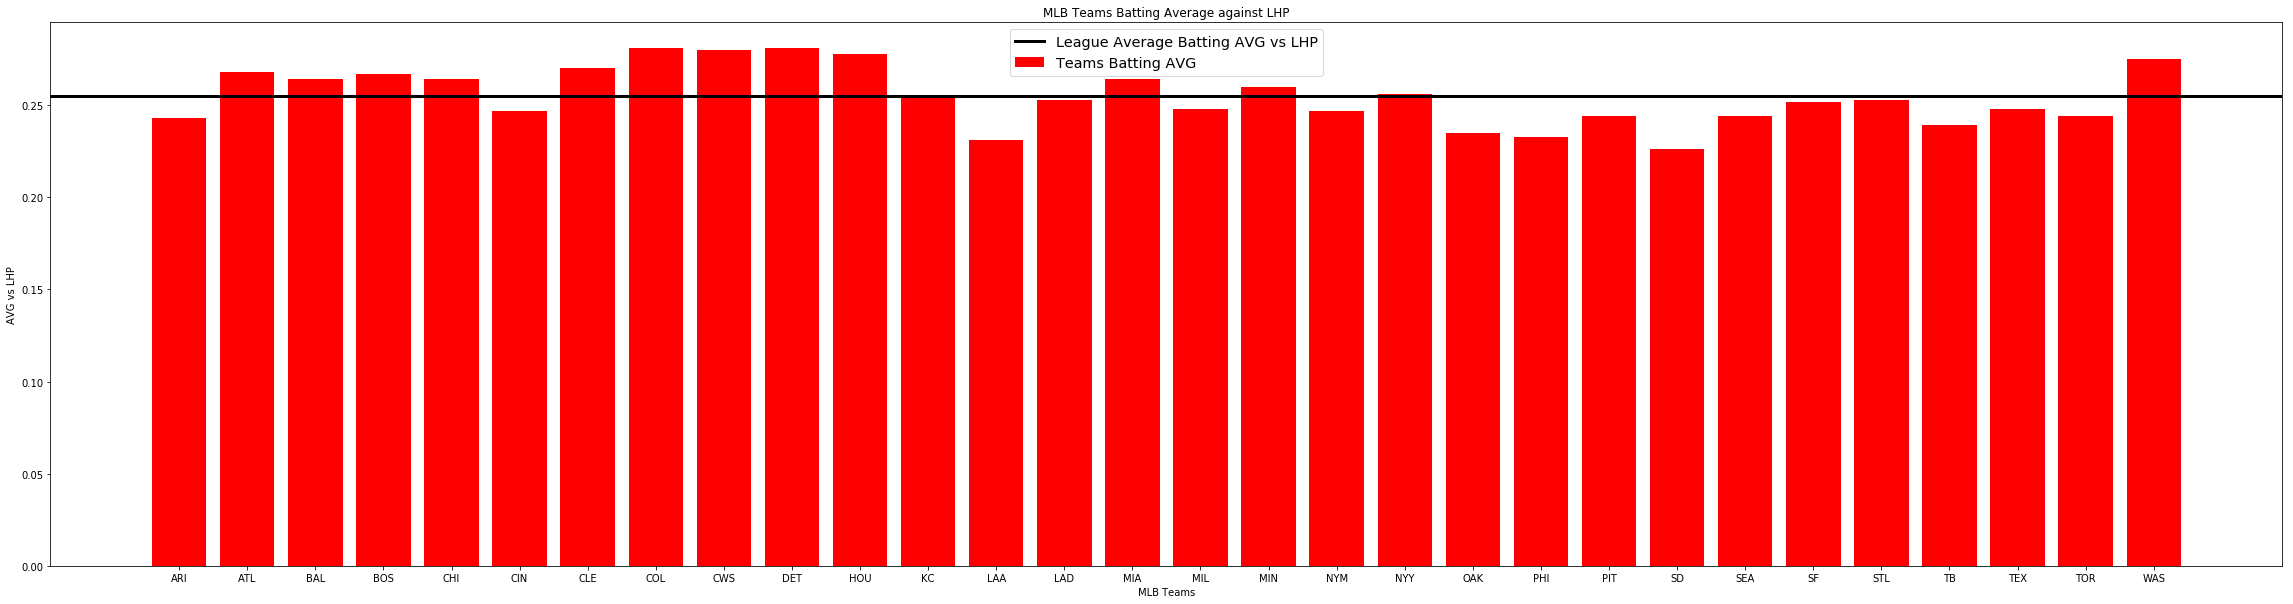

In [13]:
# creates BAR GRAPH for averages against LHP  
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#---------------------------------------------------------------#
sql_teamsAVGvsLHP = "SELECT TEAM, AVG, OBP, SLG FROM MLB_vs_LHP_2017"
teamsAVGvsLHP = pd.read_sql_query(sql_teamsAVGvsLHP, conn)
#---------------------------------------------------------------#
plt.figure(figsize=(40,10))
plt.title('MLB Teams Batting Average against LHP')
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs LHP')
plt.axhline(leagueAVGLHP, color='k', lw='3', ls='-',
           label='League Average Batting AVG vs LHP')
plt.bar(teamsAVGvsLHP['TEAM'], teamsAVGvsLHP['AVG'], color='r', label='Teams Batting AVG')
plt.legend(fontsize='x-large');

#### Of the 30 teams in the MLB, only 13 teams hit above the leage average against LHP.  But, it looks like at least 11 of those teams hit *well* over the average.

#### Using the same layout as before.  I graphed the batting averages of each MLB team against that of the leagues average against RHP.

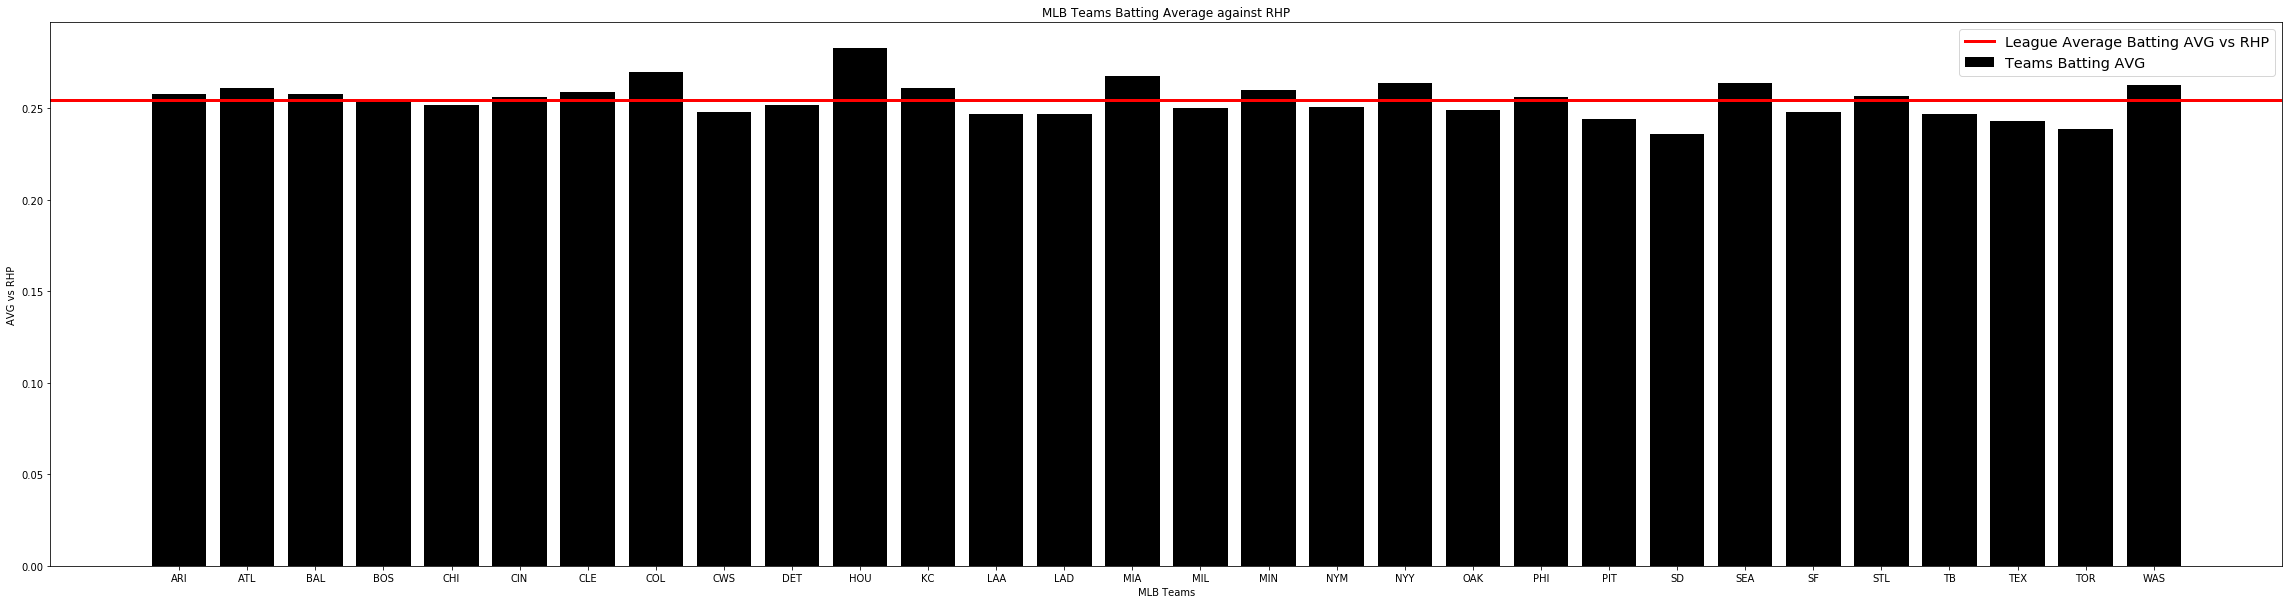

In [14]:
# creates BAR GRAPH for averages against RHP
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#---------------------------------------------------------------------#
sql_teamsAVGvsRHP = "SELECT TEAM, AVG, OBP, SLG FROM MLB_vs_RHP_2017"
teamsAVGvsRHP = pd.read_sql_query(sql_teamsAVGvsRHP, conn)
#---------------------------------------------------------------------#
plt.figure(figsize=(40, 10))
plt.title('MLB Teams Batting Average against RHP')
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs RHP')
plt.axhline(leagueAVGRHP, color='r', lw='3', ls='-',
           label='League Average Batting AVG vs RHP')
plt.bar(teamsAVGvsRHP['TEAM'], teamsAVGvsRHP['AVG'], color='k', label='Teams Batting AVG')
plt.legend(fontsize='x-large');

#### We can see that 15 teams hit above the league batting average and only 5 of those teams hit *well* above the average.

#### So with that information we see that against LHP:

-  13 hit above league average

-  11 of which hit **well** over the average

#### While against RHP:

-  15 hit above the league average

-  5 of which hit **well** over the average

#### Utilizing that data, we get mixed answers.  While teams did hit less against LHP, more teams hit over the league average against LHP than they did RHP.  Now you have to take into consideration that there are less LHP in the MLB so there were less at-bats against them which would result in results being higher.  The next step is to compare the amount of runs scored per hit against each pitcher.

#### Pulling from the same data as before, we can compare teams average runs scored per hit against each pitcher.  We can also use the leagues comparitive data and establish a league average runs scored per hit.  First up is the chart against LHP.

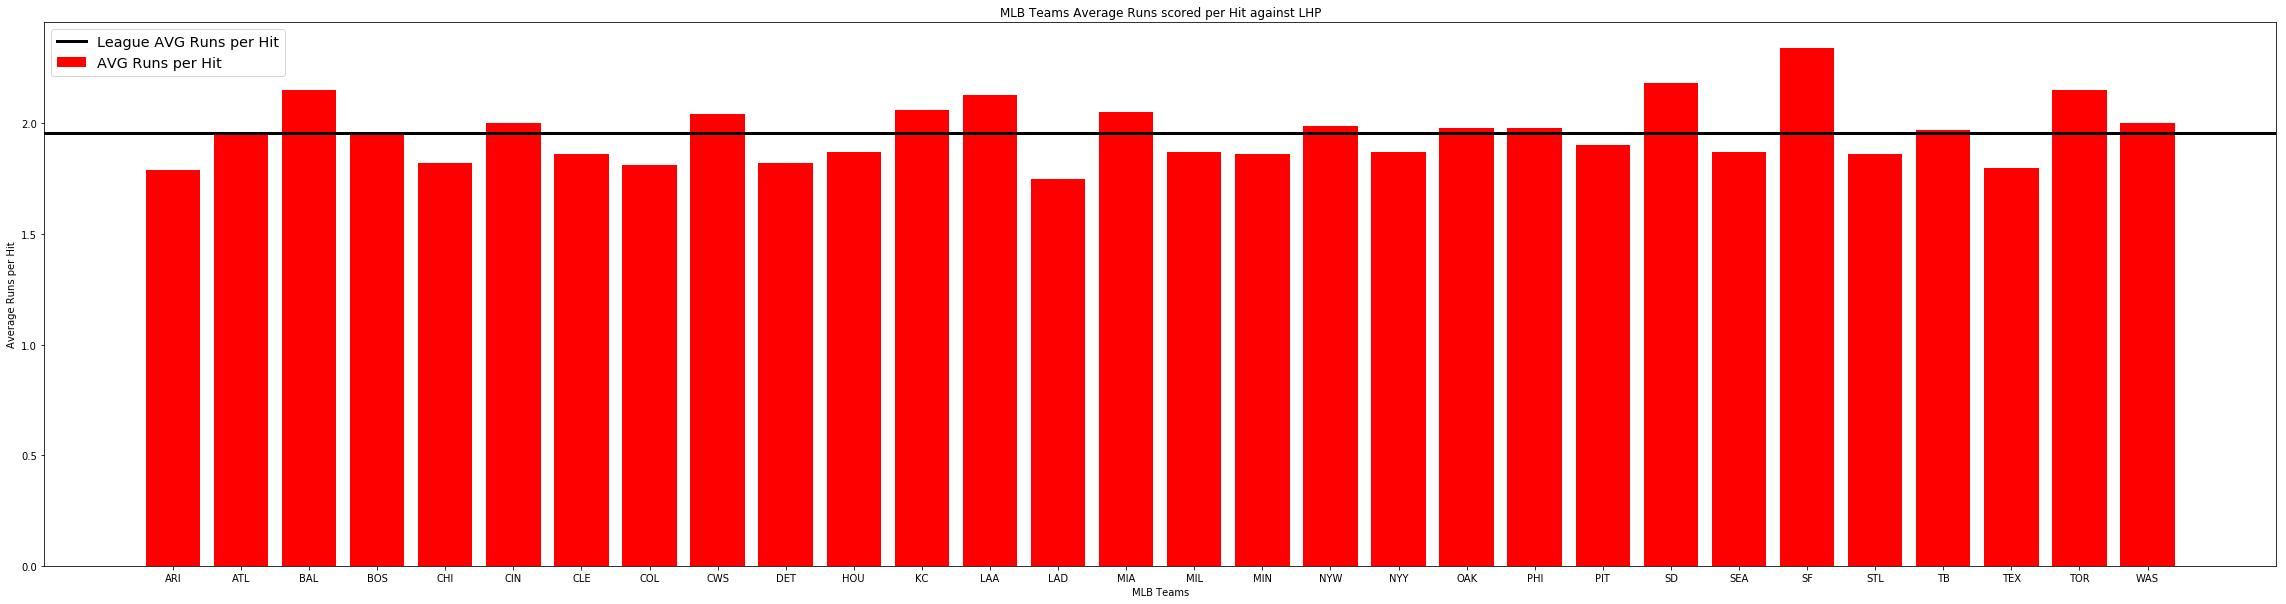

In [15]:
# bar graph comparing teams average runs per hit against the leagues average against LHP
conn =sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-----------------------------------------------#
sql_MLBvsLHP = "SELECT * FROM MLBvsLHP"
MLBvsLHP = pd.read_sql_query(sql_MLBvsLHP, conn)
#-----------------------------------------------#
plt.figure(figsize=(40, 10))
plt.title('MLB Teams Average Runs scored per Hit against LHP')
plt.xlabel('MLB Teams')
plt.ylabel('Average Runs per Hit')
plt.axhline(leagueRunAvgLHP, color='k', lw='3', ls='-', label='League AVG Runs per Hit')
plt.bar(MLBvsLHP['TEAM'], MLBvsLHP['RunRatio'], color='r', label='AVG Runs per Hit')
plt.legend(fontsize='x-large', loc='upper left');

#### Comparing against the league average we see that 14 teams were able to score more runs per hit, of which, 8 hit *well* over the league average.

#### When we use the same data, and compare it against RHP...

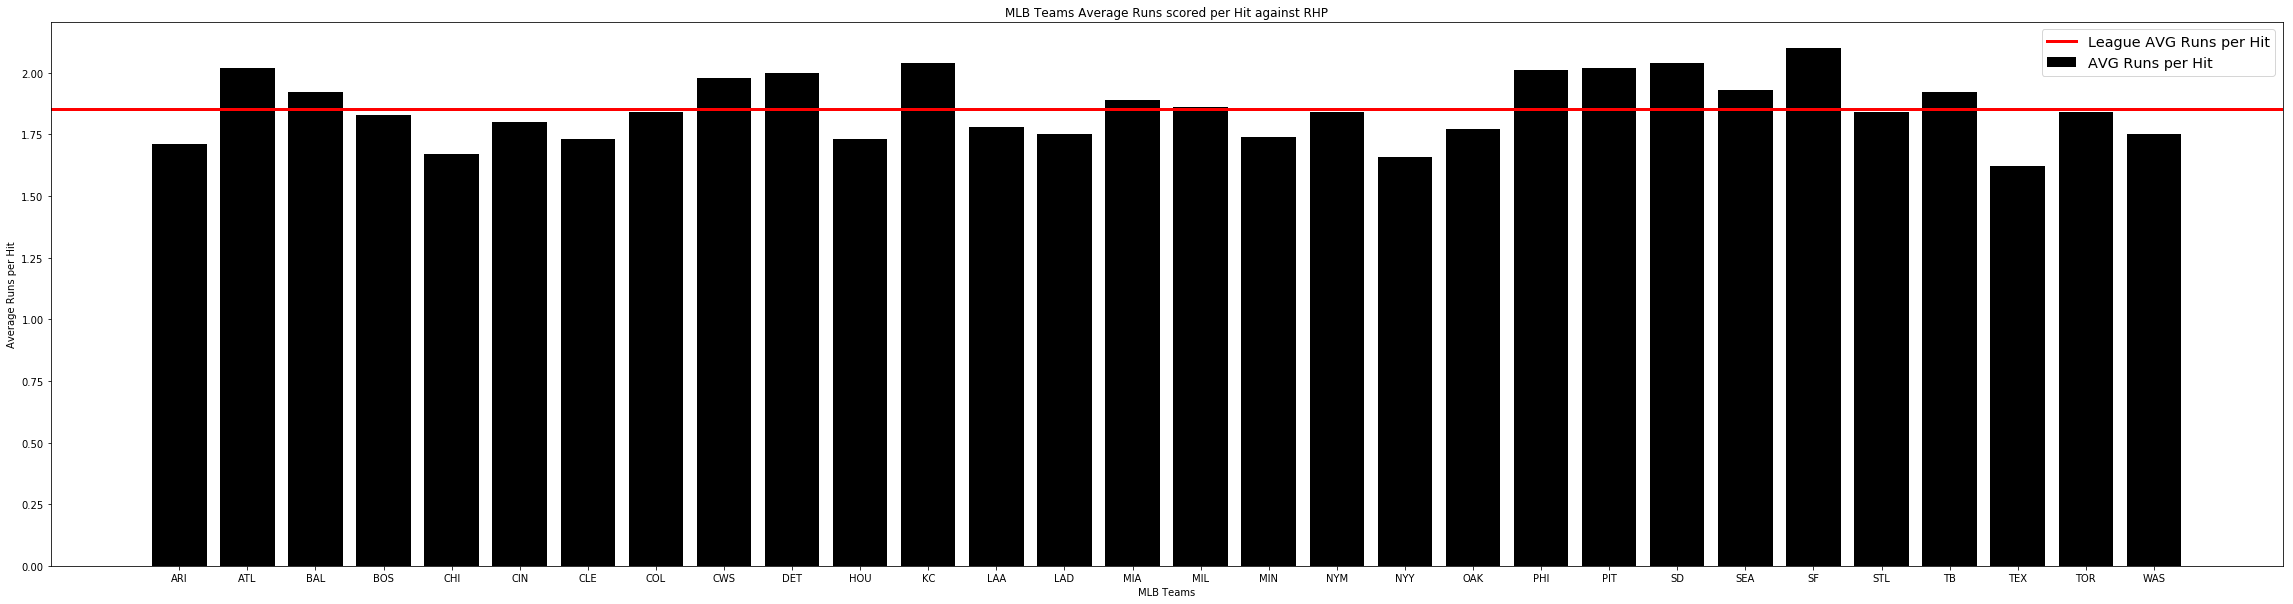

In [16]:
# bar graph comparing teams average runs per hit against the leagues average against RHP
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-----------------------------------------------#
sql_MLBvsRHP = "SELECT * FROM MLBvsRHP"
MLBvsRHP = pd.read_sql_query(sql_MLBvsRHP, conn)
#-----------------------------------------------#
plt.figure(figsize=(40, 10))
plt.title('MLB Teams Average Runs scored per Hit against RHP')
plt.xlabel('MLB Teams')
plt.ylabel('Average Runs per Hit')
plt.axhline(leagueRunAvgRHP, color='r', lw='3', ls='-', label='League AVG Runs per Hit')
plt.bar(MLBvsRHP['TEAM'], MLBvsRHP['RunRatio'], color='k', label='AVG Runs per Hit')
plt.legend(fontsize='x-large');

#### We see that 13 teams hit above the league average of runs per hit, while 11 hit *well* over the league average.

#### Taking all that into consideration we conclude that against LHP:

-  14 teams hit over the league average

-  8 of which hit **well** over the average

#### In comparitive to RHP:

-  13 teams hit over the league average

-  11 of which hit **well** over the average

#### Below we can actually see the data in a side by side comparison

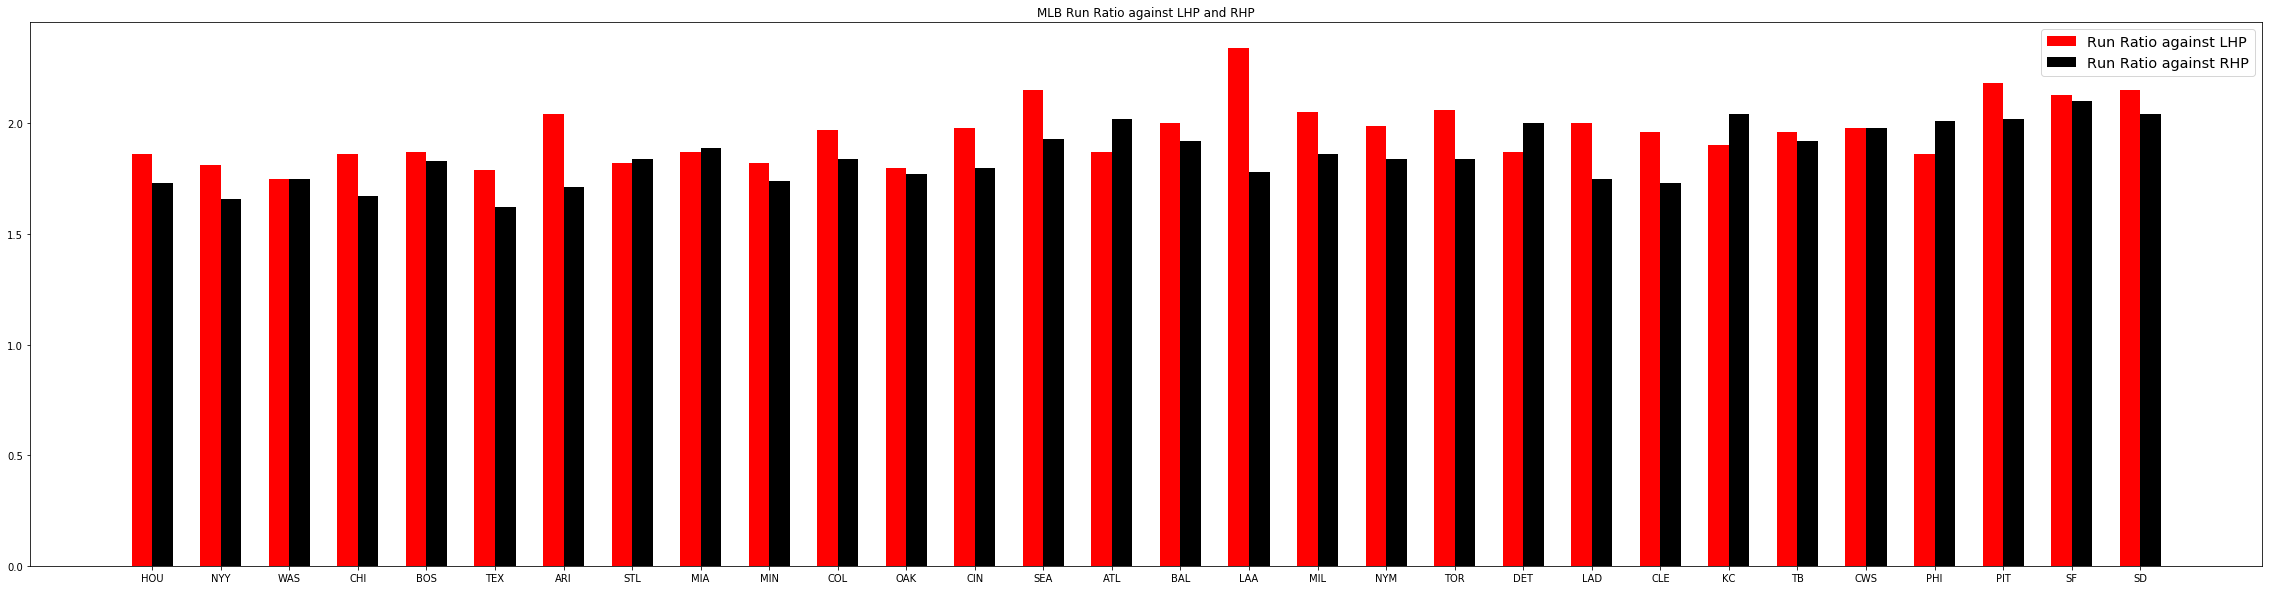

In [17]:
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-------------------------------------#
plt.figure(figsize=(40, 10))
ax = plt.subplot()
N = 30
w = 0.3

ind = np.arange(N)

LHP = ax.bar(ind, MLBvsLHP['RunRatio'], w, color='r', label="Run Ratio against LHP")
RHP = ax.bar(ind + w, MLBvsRHP['RunRatio'], w, color='k', label="Run Ratio against RHP")

ax.set_xticks(ind + w / 2)
ax.set_xticklabels(MLBvsRHP['TEAM'])
plt.title('MLB Run Ratio against LHP and RHP')
plt.legend(fontsize='x-large')
plt.show();

#### With all that I have gathered so far, it is still inconclusive if the theory is true. There is only a one or two team difference between teams averages vs the leagues average against each pitcher.  And while they are leaning more in favor of LHP, it is not by much. 

#### The last thing to do is to take all the data and see which pitcher gives up the most runs.  This data will even out the playing field.  This is taking the amount of AB that each pitcher has faced, and then divided that by the amount of runs that they have given up.  Using that data we get the chart below.

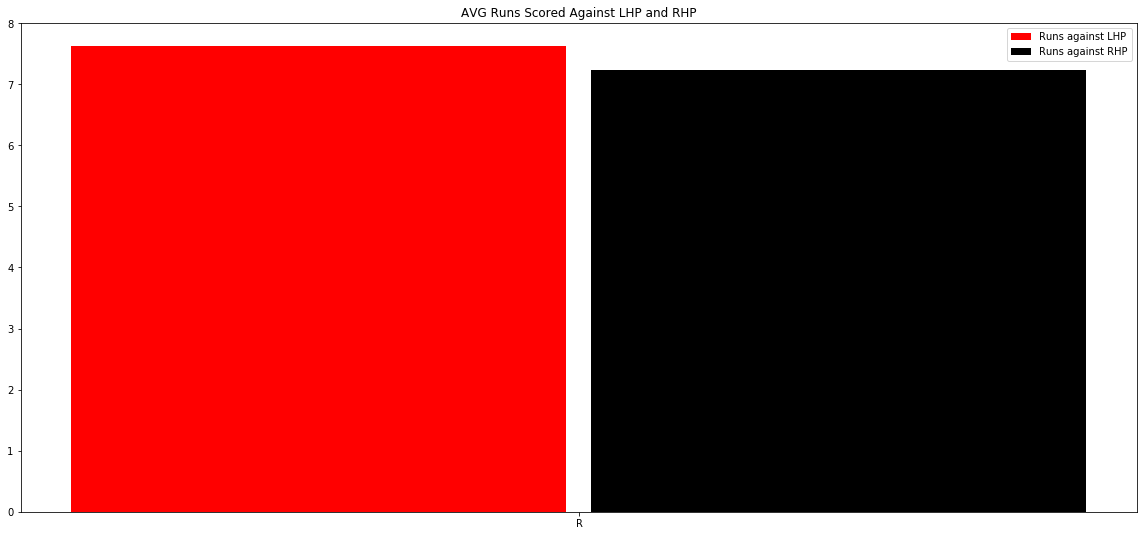

In [18]:
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-------------------------------------------------------------#
sqlAvgLHP = """SELECT AB/(1.0*R) AS 'AB/R' FROM LHP_RvsAB"""
avgLHP = pd.read_sql_query(sqlAvgLHP, conn)
#-------------------------------------------------------------#
sqlAvgRHP = """SELECT AB/(1.0*R) AS 'AB/R' FROM RHP_RvsAB"""
avgRHP = pd.read_sql_query(sqlAvgRHP, conn)
#-------------------------------------------------------------#
plt.figure(figsize=(20, 9))
ax = plt.subplot()
N = 1
w = .3

ind = np.arange(N)

LHP = ax.bar(ind, avgLHP['AB/R'], w, color='r', label='Runs against LHP')
RHP = ax.bar(ind + w*1.05, avgRHP['AB/R'], w, color='k', label='Runs against RHP')
ax.set_xticks(ind + w / 1.90)
ax.set_xticklabels(('R'))
ax.legend(loc=1)

plt.title('AVG Runs Scored Against LHP and RHP')
plt.show();

#### As we can see, while even though the numbers are close, it is still clear that the LHP gives up more runs than that of the RHP. 

## So to recap:

### When it comes to actual batting averages:

- More teams hit a higher batting average against RHP, however; more teams hit well over the league average against LHP.

### When it comes to runs scored per hit:

- More teams scored more runs per hit against LHP, however; more teams hit well over the league average against RHP.

### When it comes to total runs scored per at bat:

- A LHP gave up more runs per at bat than the RHP.

# Our Conclusion.......

<table><tr><td><img src='img/false.jpg' width=75%, height=75% ></td><td></table>


### A LHP is not better than a RHP.  If anything, batters are becoming more able to switch hit (hit from both sides of the plate), and are able to negate the effects.